In [7]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', 500)

housing_numeric = pd.read_pickle("housing_numeric.pkl")
housing_factor = pd.read_pickle("housing_factor.pkl")
housing_numeric['TotalSF'] = housing_numeric['TotalBsmtSF'] + housing_numeric['1stFlrSF'] + housing_numeric['2ndFlrSF']
housing_numeric['TotalBath'] = housing_numeric['BsmtFullBath'] + (housing_numeric['BsmtHalfBath']*0.5) + housing_numeric['FullBath'] + (housing_numeric['HalfBath']*0.5)
housing_factor['MixedExterior'] = housing_factor['Exterior1st'] + ' - ' + housing_factor['Exterior2nd']

housing = pd.concat([housing_numeric, housing_factor], axis=1)
SalePrice = housing['SalePrice']

housing['YrMoSold'] = pd.to_datetime(housing['YrSold'].astype(str) + 
                                        housing['MoSold'].astype(str), format='%Y%m')

In [8]:
housing_refined = housing[['MasVnrArea', 'MasVnrType', 'GarageArea', 'LotArea', 'GrLivArea', 'BsmtUnfSF', 
                           'BsmtFinSF1', 'LotFrontage', 'YearBuilt', 'Neighborhood', 'GarageType', 'OverallQual',
                           'TotRmsAbvGrd', 'YearRemodAdd', 'MSSubClass', 'OverallCond', 'GarageFinish', 'TotalSF',
                           'TotalBath', 'MixedExterior', 'Fireplaces', 'LowQualFinSF', 'OpenPorchSF', 'LotShape', 'GarageYrBlt', 'YrMoSold']].copy()
housing_refined.to_pickle('housing_refined.pkl')

housing_numeric_refined = housing[['MasVnrArea', 'GarageArea', 'LotArea', 'GrLivArea', 'BsmtUnfSF', 
                           'BsmtFinSF1', 'LotFrontage', 'YearBuilt',
                           'TotRmsAbvGrd', 'TotalSF',
                           'TotalBath', 'Fireplaces', 'LowQualFinSF', 'GarageYrBlt']].copy()

In [9]:
housing_refined

,MasVnrArea,MasVnrType,GarageArea,LotArea,GrLivArea,BsmtUnfSF,BsmtFinSF1,LotFrontage,YearBuilt,Neighborhood,...,GarageFinish,TotalSF,TotalBath,MixedExterior,Fireplaces,LowQualFinSF,OpenPorchSF,LotShape,GarageYrBlt,YrMoSold
1,0.0,NoVeneer,399.0,7890,856,618.0,238.0,68.516053,1939,SWISU,...,Unf,1712.0,2.0,Wd Sdng - Wd Sdng,1,0,0,Reg,1939.0,2010-03-01
2,149.0,BrkFace,266.0,4235,1049,104.0,552.0,42.000000,1984,Edwards,...,Fin,2098.0,3.0,HdBoard - HdBoard,0,0,105,Reg,1984.0,2009-02-01
3,0.0,NoVeneer,216.0,6060,1001,100.0,737.0,60.000000,1930,IDOTRR,...,Unf,1838.0,1.0,MetalSd - MetalSd,0,0,0,Reg,1930.0,2007-11-01
4,0.0,NoVeneer,281.0,8146,1039,405.0,0.0,80.000000,1900,OldTown,...,Unf,1444.0,1.0,MetalSd - MetalSd,0,0,0,Reg,1940.0,2009-05-01
5,0.0,NoVeneer,528.0,8400,1665,167.0,643.0,70.000000,2001,NWAmes,...,Fin,2475.0,3.5,VinylSd - VinylSd,0,0,45,Reg,2001.0,2009-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,NoVeneer,192.0,8854,952,952.0,0.0,68.516053,1916,BrkSide,...,Unf,1904.0,1.0,Wd Sdng - Wd Sdng,1,0,98,Reg,1916.0,2009-05-01
760,0.0,NoVeneer,452.0,13680,1733,0.0,0.0,68.516053,1955,Edwards,...,Unf,1733.0,2.0,BrkFace - Wd Sdng,1,0,0,IR1,1955.0,2009-06-01
761,0.0,NoVeneer,871.0,6270,2002,717.0,284.0,82.000000,1949,Crawfor,...,Unf,3003.0,2.0,MetalSd - MetalSd,0,0,0,Reg,1949.0,2007-08-01
762,144.0,BrkFace,486.0,8826,1842,144.0,841.0,68.516053,2000,CollgCr,...,Fin,2827.0,3.5,VinylSd - VinylSd,1,0,96,Reg,2000.0,2007-07-01


In [10]:
label_encoder = LabelEncoder()
housing_factor_dummified2 = housing_refined[['MasVnrType', 'Neighborhood', 'GarageType', 'OverallQual', 
                                             'MSSubClass', 'OverallCond', 'GarageFinish', 
                                             'MixedExterior', 'LotShape']].copy()

housing_factor_dummified2= housing_factor_dummified2.apply(label_encoder.fit_transform)

housing_factor_dummified2 = pd.get_dummies(housing_factor_dummified2, drop_first = True)
housing_factor_dummified2

,MasVnrType,Neighborhood,GarageType,OverallQual,MSSubClass,OverallCond,GarageFinish,MixedExterior,LotShape
1,2,21,5,6,6,5,3,73,3
2,1,7,1,5,0,4,0,24,3
3,2,11,5,5,6,8,3,35,3
4,2,20,5,4,11,7,3,35,3
5,2,17,1,8,10,5,0,62,3
...,...,...,...,...,...,...,...,...,...
759,2,3,5,6,6,5,3,73,3
760,2,7,1,3,5,4,3,16,0
761,2,6,0,5,15,5,3,35,3
762,1,5,1,7,10,4,0,62,3


In [11]:
housing_factor_dummified2 = pd.concat([housing_numeric_refined, housing_factor_dummified2], axis=1)
housing_factor_dummified2

,MasVnrArea,GarageArea,LotArea,GrLivArea,BsmtUnfSF,BsmtFinSF1,LotFrontage,YearBuilt,TotRmsAbvGrd,TotalSF,...,GarageYrBlt,MasVnrType,Neighborhood,GarageType,OverallQual,MSSubClass,OverallCond,GarageFinish,MixedExterior,LotShape
1,0.0,399.0,7890,856,618.0,238.0,68.516053,1939,4,1712.0,...,1939.0,2,21,5,6,6,5,3,73,3
2,149.0,266.0,4235,1049,104.0,552.0,42.000000,1984,5,2098.0,...,1984.0,1,7,1,5,0,4,0,24,3
3,0.0,216.0,6060,1001,100.0,737.0,60.000000,1930,5,1838.0,...,1930.0,2,11,5,5,6,8,3,35,3
4,0.0,281.0,8146,1039,405.0,0.0,80.000000,1900,6,1444.0,...,1940.0,2,20,5,4,11,7,3,35,3
5,0.0,528.0,8400,1665,167.0,643.0,70.000000,2001,6,2475.0,...,2001.0,2,17,1,8,10,5,0,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,192.0,8854,952,952.0,0.0,68.516053,1916,4,1904.0,...,1916.0,2,3,5,6,6,5,3,73,3
760,0.0,452.0,13680,1733,0.0,0.0,68.516053,1955,8,1733.0,...,1955.0,2,7,1,3,5,4,3,16,0
761,0.0,871.0,6270,2002,717.0,284.0,82.000000,1949,8,3003.0,...,1949.0,2,6,0,5,15,5,3,35,3
762,144.0,486.0,8826,1842,144.0,841.0,68.516053,2000,7,2827.0,...,2000.0,1,5,1,7,10,4,0,62,3


In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(housing_factor_dummified2, SalePrice)

LinearRegression()

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.900e+01, 1.018e+03,
        1.475e+03, 4.700e+01, 1.200e+01, 7.000e+00]),
 array([-385847.26645933, -322535.6893753 , -259224.11229126,
        -195912.53520722, -132600.95812319,  -69289.38103915,
          -5977.80395511,   57333.77312893,  120645.35021296,
         183956.927297  ,  247268.50438104]),
 <BarContainer object of 10 artists>)

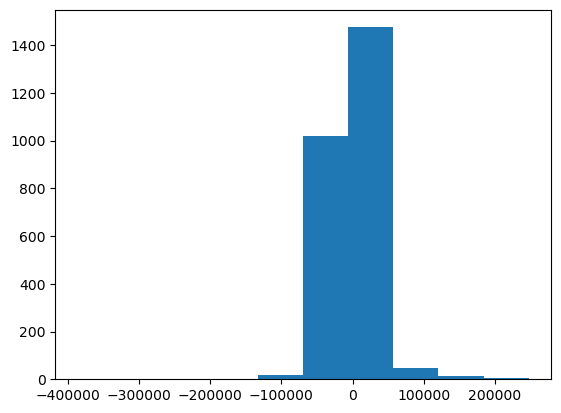

In [13]:
import matplotlib.pyplot as plt
residuals = SalePrice - lm.predict(housing_factor_dummified2)
plt.hist(residuals)

In [14]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified2,SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.834
RSS is equal to 2417290488785.160
The intercept is -1376536.009
The slopes are [ 5.53182256e+01  4.13393735e+01  4.51898004e-01  3.08988746e+01
 -7.41339876e+00  1.52456879e+01  1.57203526e+02  4.86433634e+02
 -2.64672776e+03  3.63007409e+01 -1.42667519e+03  8.48230659e+03
  1.52367687e+01  1.74847830e+02  1.00093817e+04  2.28872959e+02
  1.59434786e+03  4.77482521e+03 -3.87481427e+02  8.58781333e+03
 -4.20887469e+03  1.04935896e+02 -1.05801290e+03]


In [15]:
print('negative slope column names %s' %(housing_factor_dummified2.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(housing_factor_dummified2.columns[lm.coef_ > 0]))

negative slope column names Index(['BsmtUnfSF', 'TotRmsAbvGrd', 'TotalBath', 'MSSubClass', 'GarageFinish',
       'LotShape'],
      dtype='object')
positive slope column names Index(['MasVnrArea', 'GarageArea', 'LotArea', 'GrLivArea', 'BsmtFinSF1',
       'LotFrontage', 'YearBuilt', 'TotalSF', 'Fireplaces', 'LowQualFinSF',
       'GarageYrBlt', 'MasVnrType', 'Neighborhood', 'GarageType',
       'OverallQual', 'OverallCond', 'MixedExterior'],
      dtype='object')


(array([   2.,    0.,    0.,    5.,    4.,   91., 1492.,  931.,   46.,
           9.]),
 array([-1.64564054, -1.40653531, -1.16743008, -0.92832484, -0.68921961,
        -0.45011438, -0.21100914,  0.02809609,  0.26720132,  0.50630655,
         0.74541179]),
 <BarContainer object of 10 artists>)

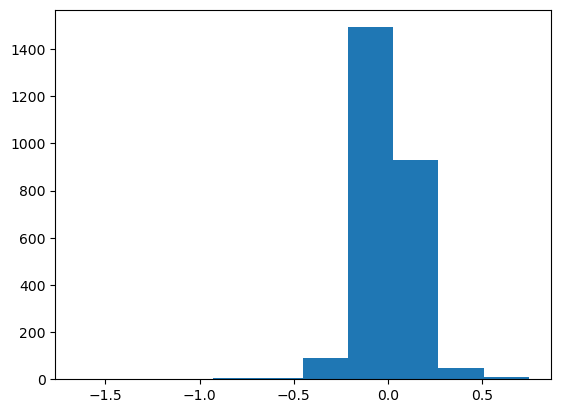

In [16]:
log_SalePrice = np.log(SalePrice) #Take log of DV
lm.fit(housing_factor_dummified2, log_SalePrice) #LM of log of DV
residuals = log_SalePrice - lm.predict(housing_factor_dummified2)
plt.hist(residuals)

In [17]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified2,log_SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.879
RSS is equal to 46.748
The intercept is 2.543
The slopes are [ 7.49777367e-05  1.85783718e-04  2.06719500e-06  1.21614184e-04
 -3.73631098e-05  4.51227886e-05  7.51357548e-04  3.29988422e-03
 -5.42300612e-03  1.79310195e-04  1.12234544e-02  4.74087674e-02
  1.27386072e-04  7.61388935e-04  2.26396854e-02  2.32387056e-04
 -6.01950821e-03  5.00444188e-02  3.23601146e-04  6.70692362e-02
 -6.86105752e-03  6.34892843e-04 -5.78741329e-03]


In [18]:
scores = {}
for idx, name1 in enumerate(housing_factor_dummified2.columns):
        myColumns = housing_factor_dummified2.columns[(idx+1):]
        pass

In [19]:
from itertools import combinations 

scores = {}

combos = combinations(housing_factor_dummified2.columns, 3)

for c in combos:
    X = housing_factor_dummified2[list(c)]
    Y = log_SalePrice
    reg = LinearRegression().fit(X,Y)
    scores[c] = reg.score (X,Y)

In [20]:
sorted(scores.items(), key=lambda features_score: abs(features_score [1]), reverse = True)

[(('YearBuilt', 'TotalSF', 'OverallCond'), 0.8102173161836371),
 (('YearBuilt', 'TotalSF', 'OverallQual'), 0.8004056504420405),
 (('TotalSF', 'GarageYrBlt', 'OverallQual'), 0.7870770999023109),
 (('GarageArea', 'TotalSF', 'OverallQual'), 0.7856600743606889),
 (('BsmtUnfSF', 'TotalSF', 'OverallQual'), 0.7847625165840402),
 (('TotalSF', 'TotalBath', 'OverallQual'), 0.7823134678140361),
 (('YearBuilt', 'TotalSF', 'Fireplaces'), 0.78131063613334),
 (('GarageArea', 'YearBuilt', 'TotalSF'), 0.7798041404853285),
 (('BsmtUnfSF', 'YearBuilt', 'TotalSF'), 0.7794430575080521),
 (('TotalSF', 'GarageType', 'OverallQual'), 0.7778096245515574),
 (('BsmtFinSF1', 'TotalSF', 'OverallQual'), 0.7764209969234339),
 (('GrLivArea', 'YearBuilt', 'TotalSF'), 0.7723193148431882),
 (('YearBuilt', 'TotalSF', 'TotalBath'), 0.7709597221216623),
 (('YearBuilt', 'TotalSF', 'GarageType'), 0.7684180568158886),
 (('TotalSF', 'OverallQual', 'GarageFinish'), 0.7683817543899552),
 (('BsmtFinSF1', 'YearBuilt', 'TotalSF'), 0

In [21]:
import statsmodels.api as sm
x = sm.add_constant(housing_factor_dummified2)
model = sm.OLS(log_SalePrice, x.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     808.7
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:16:33   Log-Likelihood:                 1513.0
No. Observations:                2580   AIC:                            -2978.
Df Residuals:                    2556   BIC:                            -2838.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5433      0.350      7.257      0.000       1.856       3.231
MasVnrArea     7.498e-05   1.93e-05      3.882      0.000    3.71e-05       0.000
GarageArea        0.0002   1.81e-05     10.276      0.000       0.000       0.000
LotArea        2.067e-06   3.66e-07      5.641      0.000    1.35e-06    2.79e-06
GrLivArea         0.0001   2.12e-05      5.748      0.000    8.01e-05       0.000
BsmtUnfSF     -3.736e-05   1.62e-05     -2.307      0.021   -6.91e-05    -5.6e-06
BsmtFinSF1     4.512e-05   1.64e-05      2.751      0.006     1.3e-05    7.73e-05
LotFrontage       0.0008      0.000      4.841      0.000       0.000       0.001
YearBuilt         0.0033      0.000     17.487      0.000       0.003       0.004
TotRmsAbvGrd     -0.0054      0.003     -1.709      0.088      -0.012       0.001
TotalSF           0.0002   1.71e-05     10.482      0.000       0.000       0.000
TotalBath         0.0112      0.006      1.997      0.046       0.000       0.022
Fireplaces        0.0474      0.005      9.426      0.000       0.038       0.057
LowQualFinSF      0.0001   6.37e-05      1.999      0.046    2.46e-06       0.000
GarageYrBlt       0.0008      0.000      3.724      0.000       0.000       0.001
MasVnrType        0.0226      0.005      4.453      0.000       0.013       0.033
Neighborhood      0.0002      0.000      0.594      0.553      -0.001       0.001
GarageType       -0.0060      0.002     -3.291      0.001      -0.010      -0.002
OverallQual       0.0500      0.003     19.180      0.000       0.045       0.055
MSSubClass        0.0003      0.001      0.354      0.723      -0.001       0.002
OverallCond       0.0671      0.003     25.215      0.000       0.062       0.072
GarageFinish     -0.0069      0.003     -2.523      0.012      -0.012      -0.002
MixedExterior     0.0006      0.000      4.575      0.000       0.000       0.001
LotShape         -0.0058      0.002     -2.830      0.005      -0.010      -0.002
==============================================================================
Omnibus:                     1001.418   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32585.403
Skew:                          -1.191   Prob(JB):                         0.00
Kurtosis:                      20.247   Cond. No.                     1.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < .05].sort_values()

The significant coefficients


OverallCond      1.798756e-125
OverallQual       1.043644e-76
YearBuilt         9.200996e-65
TotalSF           3.355548e-25
GarageArea        2.659971e-24
Fireplaces        9.176173e-21
const             5.236395e-13
GrLivArea         1.009464e-08
LotArea           1.874905e-08
LotFrontage       1.369393e-06
MixedExterior     5.000707e-06
MasVnrType        8.837031e-06
MasVnrArea        1.060431e-04
GarageYrBlt       2.005872e-04
GarageType        1.013372e-03
LotShape          4.684713e-03
BsmtFinSF1        5.976681e-03
GarageFinish      1.168252e-02
BsmtUnfSF         2.114778e-02
LowQualFinSF      4.566449e-02
TotalBath         4.596552e-02
dtype: float64

In [23]:
print('The insignificant coefficients')
pValues[pValues > .05]

The insignificant coefficients


TotRmsAbvGrd    0.087631
Neighborhood    0.552748
MSSubClass      0.723385
dtype: float64